In [728]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # model validation procedure that splits a dataset into a training and testing set to see how model performs on new data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [729]:
# PREDICT whether a student passes or fails based on different independent variables 
# Convert Y, DEPENDENT VARIABLE (Performance Index) to categorical variable i.e binary 1/0
df = pd.read_csv("Student_Performance.csv")
df['Target'] = df['Performance Index'].apply(lambda x: '1' if x >= 60 else '0')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Target
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,1
2,8,51,Yes,7,2,45.0,0
3,5,52,Yes,5,2,36.0,0
4,7,75,No,8,5,66.0,1
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,0
9996,7,64,Yes,8,5,58.0,0
9997,6,83,Yes,8,5,74.0,1
9998,9,97,Yes,7,0,95.0,1


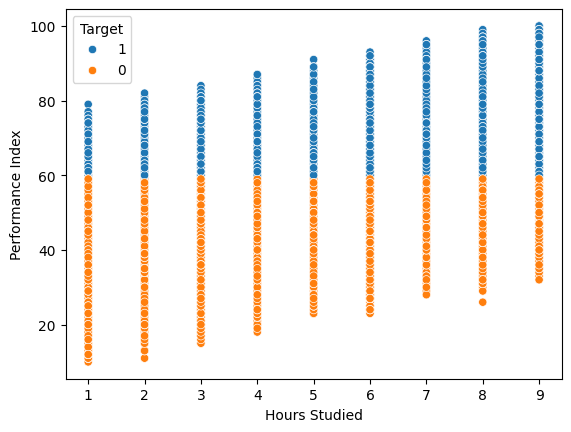

In [730]:
# scatter plot
sns.scatterplot(data=df, x = 'Hours Studied', y = 'Performance Index', hue='Target')

plt.show()

### Train & Test the model

In [731]:
X = df[['Hours Studied']]  
y = df['Target']

# Split the dataset into random training and testing sets
# 80% training the model (make it learn)
# 20% testing how well the model performs on new unseen
# random_state = 42 ensures the split is reproducible

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# TRAIN_TEST_SPLIT - suffles the rows in the dataset and splits the data 20% test 80%training
# X_test, y_test - held back used for later to test performance
# random_state ensures that every time you run the code, you get the same split.


### Machine learning is about training a model to learn from past data, you give it data bout students, how many hours they slept, how they performed, the model tries to learn a pattern

### Here we train the model only using training data

In [732]:
# Train logistic regression model - LogisticRegression()
model = LogisticRegression()   
model.fit(X_train, y_train)    
# We train it on the data so it learns how sleep hours affect performance.

LogisticRegression()

### Use the data to evaluate a model after model is done training

In [733]:
# Now the model is done training, you give it the test inputs (X_test and see what it predicts)
# predictions are stored in y_pred
y_pred = model.predict(X_test) # containts labels [0,1]

# PREDICT_PROBA returns an array with columns representing the predicted probabilities for each class
# i.e returns the [probability of class 0(failing), proability of class 1(passing)]
proba = model.predict_proba(X_test)
# [[0.5718748  0.4281252 ] - 57% chance student fails, 28% chance students passes] on X_test values
# [[0.48115465 0.51884535] - on the original X values

# Get predicted probabilities
results = X_test.copy()

results['P(Failing)'] = proba[:,0]
results['P(Passing)'] = proba[:,1]
results.head()

,Hours Studied,P(Failing),P(Passing)
6252,5,0.571875,0.428125
4684,2,0.697809,0.302191
1731,7,0.481155,0.518845
4742,6,0.526735,0.473265
4521,7,0.481155,0.518845


### Predict if the stuednt passes if they study 4 hours, give probability & pass 0 or 1

In [734]:
hours_slept = [[8]]
prediction = model.predict(hours_slept)

print("Predicted class (1 = good performance):", prediction[0])
prediction = model.predict_proba(hours_slept)
print("Probability of poor performance:", proba[0][0])
print("Probability of good performance:", proba[0][1])

Predicted class (1 = good performance): 1
Probability of poor performance: 0.571874796150784
Probability of good performance: 0.4281252038492161


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [735]:
for i in range(1, 11):
    proba = model.predict_proba([[i]])
    print(f"{i} hours → P(Fail): {proba[0][0]:.2f}, P(Pass): {proba[0][1]:.2f}")

1 hours → P(Fail): 0.73, P(Pass): 0.27
2 hours → P(Fail): 0.70, P(Pass): 0.30
3 hours → P(Fail): 0.66, P(Pass): 0.34
4 hours → P(Fail): 0.62, P(Pass): 0.38
5 hours → P(Fail): 0.57, P(Pass): 0.43
6 hours → P(Fail): 0.53, P(Pass): 0.47
7 hours → P(Fail): 0.48, P(Pass): 0.52
8 hours → P(Fail): 0.44, P(Pass): 0.56
9 hours → P(Fail): 0.39, P(Pass): 0.61
10 hours → P(Fail): 0.35, P(Pass): 0.65


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

### Re-check this and understand

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


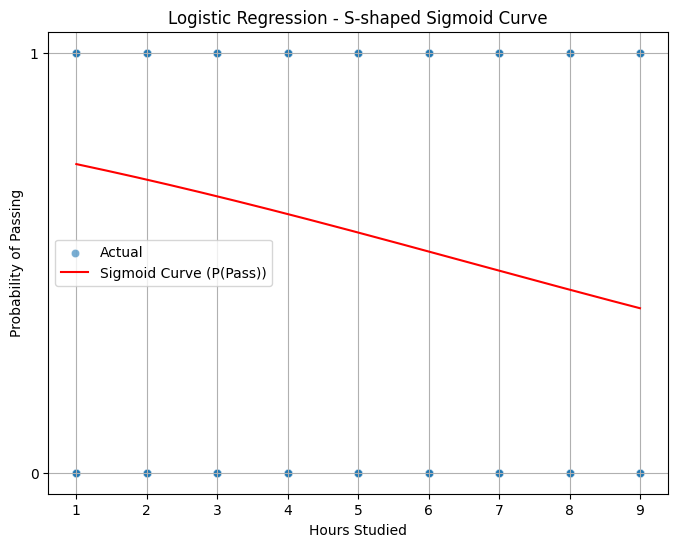

In [736]:
# Plotting the sigmoid curve
# Create a range of study hours for a smooth curve
x_range = np.linspace(df['Hours Studied'].min(), df['Hours Studied'].max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(x_range)[:, 1]  # Probability of passing

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours Studied', y='Target', label="Actual", alpha=0.6)
plt.plot(x_range, y_prob, color='red', label='Sigmoid Curve (P(Pass))')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression - S-shaped Sigmoid Curve')
plt.legend()
plt.grid(True)
plt.show()


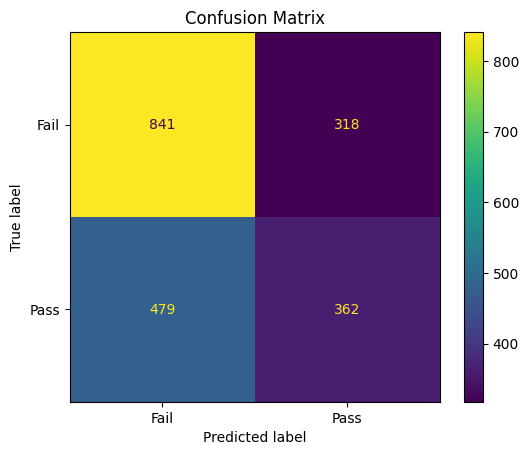

In [737]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [738]:
# Classification report, showing precision, F1-score, support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1159
           1       0.53      0.43      0.48       841

    accuracy                           0.60      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.59      0.60      0.59      2000

